In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# UNIFORM RANDOM DISTRIBUTION OF POINTS ON UNIT SPHERE.
def random_spin():
    x = np.random.normal(0, 1, 3)
    x = x/np.sqrt(x@x)
    
    return x

# RETURN THE VALUE OF SPIN MAGNITUDE.
def spin(j):
    s = spin_config[j]
    if (len(s) == 3):
        spin_val = 1
    elif (len(s) == 1):
        spin_val = 0
        
    return spin_val

# INITIALIZE ENERGY OF THE SYSTEM.
def initialize_energy():
    Energy = 0
    for i in range(n):
        Energy += J*(spin_config[i]@spin_config[(i+1)%n])
        
    return Energy

In [3]:
def dot(v1, v2):
    if (len(v1) == 3 and len(v2) == 3):
        dot_prod = v1@v2
    else:
        dot_prod = 0
        
    return dot_prod

In [4]:
def spin_rotation(ix):
    global E
    global spin_config

    spin_new = random_spin()
    dS = spin_new - spin_config[ix]
    
    # Calculating change in E.
    dE = J*(dot(dS, spin_config[(ix - 1)%n]) + dot(dS, spin_config[(ix + 1)%n]))
    
    # Metropolis implementation.
    
    p_accept = min(1, np.exp(-beta*dE))
    if (np.random.random() <= p_accept):
        spin_config[ix] = spin_new
        E += dE

In [5]:
def make_dimer(ix):
    global E
    global spin_config

    # jx is the selected neighbour. ix is the original site.

    unpaired_list = []
    for nbr in [(ix-1), (ix+1)]:
        if (spin((nbr)%n) == 1):
            unpaired_list.append(nbr)
    
    if(len(unpaired_list)==0):
        return
    
    else:
        jx = (np.random.choice(unpaired_list))%n

        # Calculate the change in energy if dimer is formed.
        E_1 = -(3*J)
        E_2 = -J*(dot(spin_config[ix], spin_config[(ix - 1)%n]) + dot(spin_config[ix], spin_config[(ix + 1)%n]))
        E_3 = -J*(dot(spin_config[jx], spin_config[(jx - 1)%n]) + dot(spin_config[jx], spin_config[(jx + 1)%n]))
        E_4 = J*(dot(spin_config[ix], spin_config[jx]))

        dE = E_1 + E_2 + E_3 + E_4

        # Metropolis implementation.

        p_accept = min(1, np.exp(-beta*dE))
        if (np.random.random() <= p_accept):
            spin_config[ix] = np.array([jx])
            spin_config[jx] = np.array([ix])
            E += dE

In [6]:
def break_dimer(ix):
    global E
    global spin_config

    jx = spin_config[ix][0]
     
    spin_config_new = np.copy(spin_config)

    # Modifying a copy of the spin configutation.
    
    spin_config_new[ix] = random_spin()
    spin_config_new[jx] = random_spin()
    
    E_1 = +(3*J)
    E_2 = +J*(dot(spin_config_new[ix], spin_config_new[(ix - 1)%n]) + dot(spin_config_new[ix], spin_config_new[(ix + 1)%n]))
    E_3 = +J*(dot(spin_config_new[jx], spin_config_new[(jx - 1)%n]) + dot(spin_config_new[jx], spin_config_new[(jx + 1)%n]))
    E_4 = -J*(dot(spin_config_new[ix], spin_config_new[jx]))
    
    dE = E_1 + E_2 + E_3 + E_4
    
    # Metropolis implementation.
    
    p_accept = min(1, np.exp(-beta*dE))
    if (np.random.random() <= p_accept):
        spin_config[ix] = spin_config_new[ix]
        spin_config[jx] = spin_config_new[jx]
        E += dE

In [7]:
# MONTE CARLO SWEEP (RANDOM)

def monte_carlo_sweep(ix):
    
    # f tunes the ratio of random spin rotations to dimer formation. Increase f to increase dimer formation.
    f = 0.5
    
    # If the chosen site has a free spin.
    if (spin(ix) == 1):
        if (f <= np.random.random()):
            spin_rotation(ix)
        else:
            make_dimer(ix)
            
    # If the chosen site is part of a dimer.        
    elif (spin(ix) == 0):
        break_dimer(ix)
        
    free_spins = []
    
    for i in range(n):
        if (spin((i)%n) == 1):
            free_spins.append(i)
    
    if(len(free_spins)==0):
        iene = E/n
        stot = np.zeros((3), dtype=np.float64)
    
        return iene, stot
    
    else:
        S = np.zeros((3), dtype=np.float64)
#         print(S)
    
        for ix in free_spins:
            S += np.array(spin_config[ix])
#             print(S, spin_config[ix])
    
#     print("Done!")

    iene = E/n
    stot = S/n
    
    return iene, stot

In [8]:
# DEFINE THE LATTICE.
n = 50
beta = 100
J = +1

global spin_config
global E 

spin_config = np.zeros((n), dtype=np.ndarray)

for i in range(n):
        spin_config[i] = random_spin()    
    
E = initialize_energy()

In [9]:
nsweeps = 100000

E_list = []
S_list = []

for i in range(nsweeps):
    ix = int(np.random.random()*n)
    E_meas, S_meas = monte_carlo_sweep(ix)
    
    E_list.append(E_meas)
    S_list.append(S_meas)
    
count_dimer = 0
for i in range(n):
    if (len(spin_config[i]) == 1):
        count_dimer +=1
        
print(spin_config)
print(count_dimer)

[array([1]) array([0]) array([3]) array([2]) array([5]) array([4])
 array([7]) array([6]) array([9]) array([8]) array([11]) array([10])
 array([-0.27646551,  0.62796761, -0.72747749]) array([14]) array([13])
 array([ 0.12778071, -0.43820355,  0.88974701]) array([17]) array([16])
 array([19]) array([18]) array([21]) array([20]) array([23]) array([22])
 array([25]) array([24]) array([27]) array([26]) array([29]) array([28])
 array([ 0.67595019, -0.21866398,  0.70375948]) array([32]) array([31])
 array([34]) array([33]) array([36]) array([35]) array([38]) array([37])
 array([40]) array([39]) array([42]) array([41]) array([44]) array([43])
 array([46]) array([45]) array([ 0.81826596, -0.44502972,  0.36385349])
 array([49]) array([48])]
46


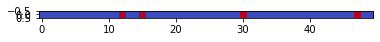

In [10]:
spin_state = np.zeros((n))

for i in range(n):
    if (len(spin_config[i]) == 3):
        spin_state[i] = 1

spin_state
plt.imshow(np.array([np.array(spin_state)]) , cmap = 'coolwarm' , interpolation = 'nearest' )
plt.show()

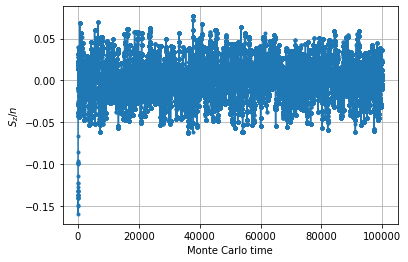

In [11]:
plt.plot(np.array(S_list).T[2], '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$S_z/n$')
plt.grid(True)
plt.show()

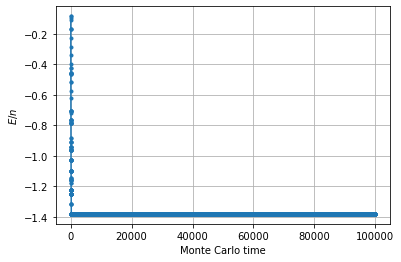

In [12]:
plt.plot(E_list, '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$E/n$')
plt.grid(True)
plt.show()

In [225]:
S_list[1379]

0